In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter


In [2]:
metadata = pd.read_csv("./../data/metadata_translations.tsv", sep = "\t", index_col=0)

In [3]:
metadata

,index,path,language,title,year,number_verses,number_chapters,number_books,source,file_name
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...
...,...,...,...,...,...,...,...,...,...,...
216,101,/versions/Reina-Valera-Revisada-RVR/#booklist,SPA,Reina Valera Revisada (RVR1977),1977,31103,1189,66,biblegateway,Reina Valera Revisada (RVR1977)
217,102,/versions/Reina-Valera-1995-RVR1995-Biblia/#bo...,SPA,Reina-Valera 1995 (RVR1995),1995,31104,1189,66,biblegateway,Reina-Valera 1995 (RVR1995)
218,103,/versions/Reina-Valera-Antigua-RVA-Biblia/#boo...,SPA,Reina-Valera Antigua (RVA),1569,31101,1189,66,biblegateway,Reina-Valera Antigua (RVA)
219,104,/versions/Spanish-Blue-Red-Gold-Letter-Edition...,SPA,Spanish Blue Red and Gold Letter Edition (SRV-...,2014,31103,1189,66,biblegateway,Spanish Blue Red and Gold Letter Edition (SRV-...


In [4]:
metadata["language"].unique()

array(['ALB', 'ARA', 'AZB', 'BAQ', 'BEL', 'BLA', 'BUL', 'CEB', 'CHA',
       'CHI', 'CKB', 'COP', 'CZE', 'DAN', 'ENG', 'ESP', 'FIN', 'FRE',
       'GAE', 'GER', 'GOT', 'GRC', 'HAT', 'HEB', 'HIN', 'HUN', 'ITA',
       'JAM', 'KOR', 'LAT', 'MAR', 'NDS', 'NL_', 'NOR', 'PON', 'POR',
       'RUM', 'RUS', 'SCR', 'SHU', 'SPA', 'SWA', 'SWE', 'SYR', 'TAM',
       'TGL', 'THA', 'TUR', 'UND', 'VIE', 'WIU', 'XKL', 'YBY', 'ZIA'],
      dtype=object)

In [5]:
len(metadata["language"].unique())


54

In [6]:
s = metadata.language.value_counts()

In [7]:
metadata[metadata.language.isin(s[s > 5].index)].language.unique().shape

(7,)

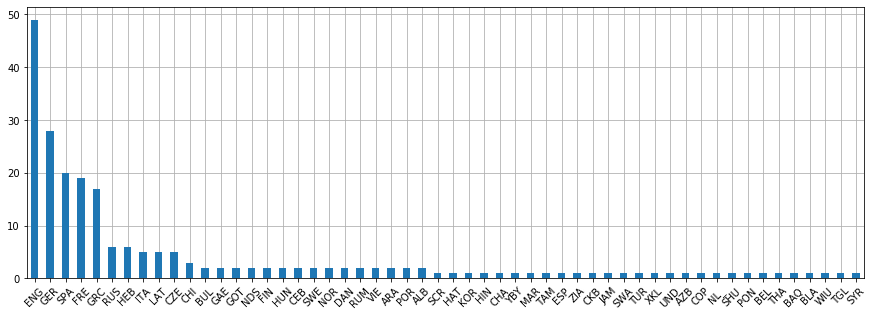

In [8]:
ax = metadata["language"].value_counts().sort_values(ascending=False).plot.bar(grid = True, figsize = (15,5), rot=45)
ax.set_axisbelow(True)




In [9]:
metadata

,index,path,language,title,year,number_verses,number_chapters,number_books,source,file_name
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...
...,...,...,...,...,...,...,...,...,...,...
216,101,/versions/Reina-Valera-Revisada-RVR/#booklist,SPA,Reina Valera Revisada (RVR1977),1977,31103,1189,66,biblegateway,Reina Valera Revisada (RVR1977)
217,102,/versions/Reina-Valera-1995-RVR1995-Biblia/#bo...,SPA,Reina-Valera 1995 (RVR1995),1995,31104,1189,66,biblegateway,Reina-Valera 1995 (RVR1995)
218,103,/versions/Reina-Valera-Antigua-RVA-Biblia/#boo...,SPA,Reina-Valera Antigua (RVA),1569,31101,1189,66,biblegateway,Reina-Valera Antigua (RVA)
219,104,/versions/Spanish-Blue-Red-Gold-Letter-Edition...,SPA,Spanish Blue Red and Gold Letter Edition (SRV-...,2014,31103,1189,66,biblegateway,Spanish Blue Red and Gold Letter Edition (SRV-...


In [10]:
metadata.language.unique()

array(['ALB', 'ARA', 'AZB', 'BAQ', 'BEL', 'BLA', 'BUL', 'CEB', 'CHA',
       'CHI', 'CKB', 'COP', 'CZE', 'DAN', 'ENG', 'ESP', 'FIN', 'FRE',
       'GAE', 'GER', 'GOT', 'GRC', 'HAT', 'HEB', 'HIN', 'HUN', 'ITA',
       'JAM', 'KOR', 'LAT', 'MAR', 'NDS', 'NL_', 'NOR', 'PON', 'POR',
       'RUM', 'RUS', 'SCR', 'SHU', 'SPA', 'SWA', 'SWE', 'SYR', 'TAM',
       'TGL', 'THA', 'TUR', 'UND', 'VIE', 'WIU', 'XKL', 'YBY', 'ZIA'],
      dtype=object)

In [11]:
len(metadata.language.unique())

54

In [12]:
languages_df = pd.read_csv("./../data/data_controlled/languages_controlled.tsv", sep="\t")

In [13]:
languages_df.sort_values("Continent")

,language-code,Language-name,Country,Continent,Type of languages,Alfabet
41,SWA,Swahili,NaN,Africa,natural,?
11,COP,Copto,NaN,Africa,natural,arabic
27,JAM,Jamaican,NaN,America,natural,latin
22,HAT,Haitian,NaN,America,natural,latin
5,BLA,Siksiká,NaN,America,natural,latin
39,SHU,Shuar,NaN,America,natural,latin
24,HIN,Hindi,NaN,Asia,natural,hindi
23,HEB,Hebrew,NaN,Asia,natural,hebrew
28,KOR,Korean,NaN,Asia,natural,korean
43,SYR,Syriac,NaN,Asia,natural,Syriac


In [14]:
", ".join(sorted(languages_df.loc[languages_df["Continent"]== "Europe"]["Language-name"].values.tolist()))

'Albanian, Basque, Belarusian, Bulgarian, Croatian, Czech, Danish, Dutsch, English, Finish, French, Gaelic, German, Gothic, Greek, Hungary, Italian, Latin, Norwegian, Plattdeutsch, Portuguese, Rumanian, Russian, Spanish, Swedish'

In [15]:
", ".join(sorted(languages_df.loc[languages_df["Continent"]== "Asia"]["Language-name"].values.tolist()))

'Arabic, Azerbaijani , Chinese, Hebrew, Hindi, Korean, Kurdish, Marathi Indian, Syriac, Tagalog, Tamil, Thai, Turkish, Vietnamese'

In [16]:
", ".join(sorted(languages_df.loc[languages_df["Continent"]== "Oceania"]["Language-name"].values.tolist()))

'Cebuano, Chamorro, Pohnpeian, Uma, Witu, Yaweyuha, Zia'

In [17]:
metadata = pd.merge(metadata, languages_df, left_on = "language", right_on="language-code")

In [18]:
metadata["Language-name"].value_counts()

English           49
German            28
Spanish           20
French            19
Greek             17
Hebrew             6
Russian            6
Latin              5
Czech              5
Italian            5
Chinese            3
Vietnamese         2
Albanian           2
Bulgarian          2
Plattdeutsch       2
Swedish            2
Hungary            2
Arabic             2
Norwegian          2
Rumanian           2
Gaelic             2
Finish             2
Gothic             2
Portuguese         2
Cebuano            2
Danish             2
Hindi              1
Syriac             1
Basque             1
Kurdish            1
Marathi Indian     1
Belarusian         1
Thai               1
Zia                1
Tamil              1
Pohnpeian          1
Croatian           1
Shuar              1
Copto              1
Korean             1
Klingoln           1
Turkish            1
Siksiká            1
Jamaican           1
Dutsch             1
Swahili            1
Esperanto          1
Haitian      

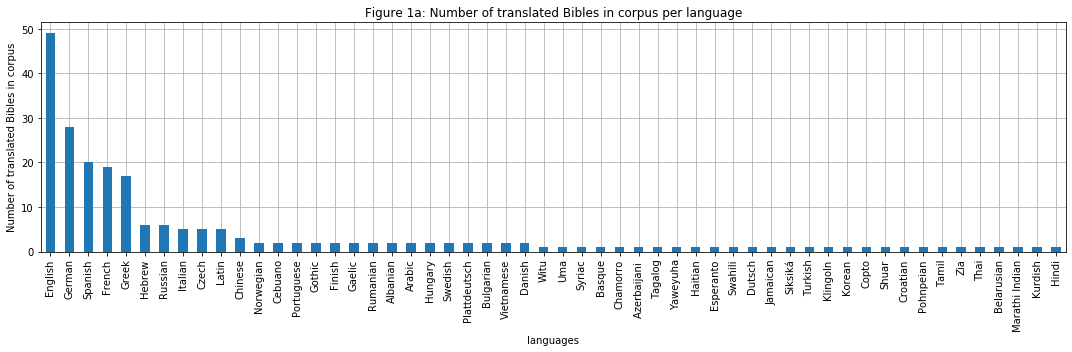

In [41]:
ax = metadata["Language-name"].value_counts().sort_values(ascending=False).plot.bar(grid = True, figsize = (15,5))
ax.set_axisbelow(True)

ax.set_xlabel("languages")
ax.set_ylabel("Number of translated Bibles in corpus")
ax.set_title("Figure 1a: Number of translated Bibles in corpus per language")

fig = ax.get_figure()
plt.tight_layout()

fig.savefig( "./../visualizations/figure01a_bar_plot_translations.png", dpi=300, format="png")

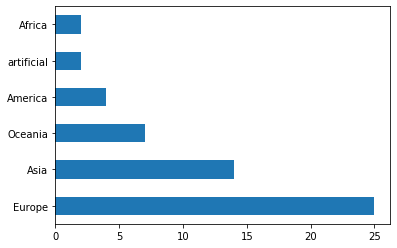

In [20]:
languages_df.Continent.value_counts().plot.barh()

In [21]:
import seaborn as sns

In [22]:
metadata

,index,path,language,title,year,number_verses,number_chapters,number_books,source,file_name,language-code,Language-name,Country,Continent,Type of languages,Alfabet
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,ALB,Albanian,NaN,Europe,natural,?
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),ALB,Albanian,NaN,Europe,natural,?
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,ARA,Arabic,NaN,Asia,natural,latin
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,ARA,Arabic,NaN,Asia,natural,latin
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,AZB,Azerbaijani,NaN,Asia,natural,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),VIE,Vietnamese,NaN,Asia,natural,?
217,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),WIU,Witu,Papua New Guinea,Oceania,natural,?
218,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),XKL,Klingoln,NaN,artificial,artificial,latin
219,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),YBY,Yaweyuha,Papua New Guinea,Oceania,natural,?


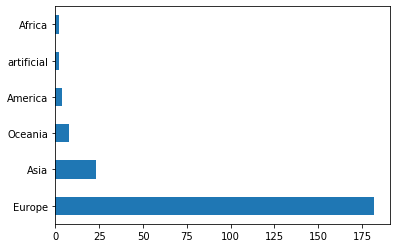

In [23]:

metadata.Continent.value_counts().plot.barh()

In [24]:
s = metadata.language.value_counts()

selected_languages = s.loc[s > 3].index.tolist()
selected_languages

['ENG', 'GER', 'SPA', 'FRE', 'GRC', 'RUS', 'HEB', 'CZE', 'LAT', 'ITA']

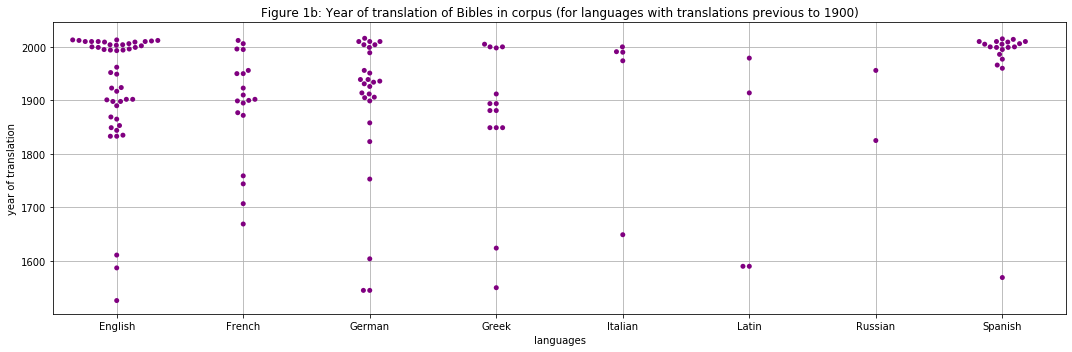

In [40]:
fig, ax = plt.subplots(figsize = (15,5))

#sns.set(style="whitegrid")
sns.swarmplot(y="year", x="Language-name", data=metadata.loc[(metadata["year"] > 1400) & (metadata["language"].isin(selected_languages))], size=5, color="purple")

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True)

ax.set_xlabel("languages")
ax.set_ylabel("year of translation")
ax.set_title("Figure 1b: Year of translation of Bibles in corpus (for languages with translations previous to 1900)")

plt.tight_layout()
fig = ax.get_figure()

fig.savefig( "./../visualizations/figure01b_swarm_plot_translations.png", dpi=300, format="png")


In [26]:
metadata.loc[(metadata["year"] != 0)].shape

(149, 16)

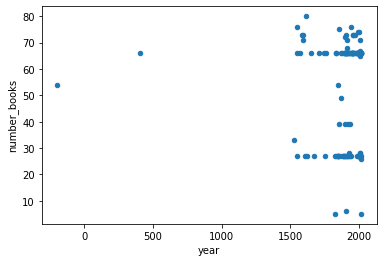

In [27]:
metadata.loc[metadata["year"] != 0].plot.scatter("year", "number_books")

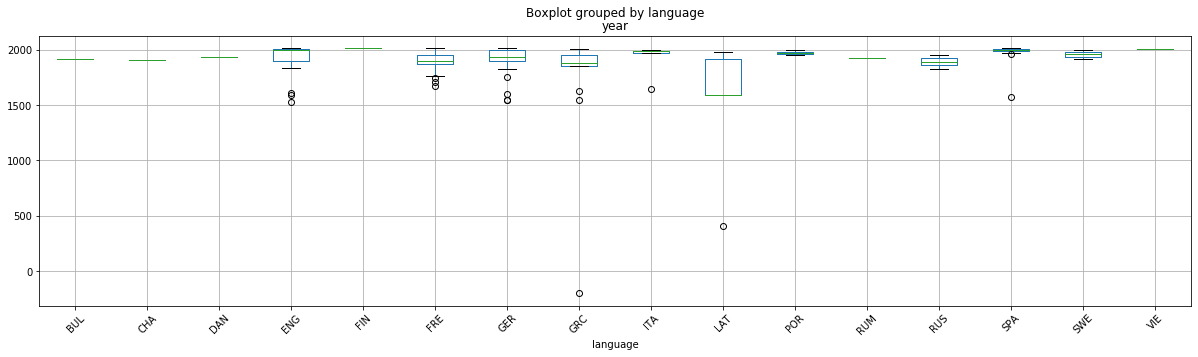

In [28]:
metadata.loc[metadata["year"]!=0].boxplot("year", by = "language", figsize=(20,5), rot=45)

In [29]:
languages_df = pd.read_csv("./../data/data_controlled/languages_controlled.tsv", sep="\t", index_col=0)

In [30]:
languages_df.Continent.value_counts()

Europe        25
Asia          14
Oceania        7
America        4
artificial     2
Africa         2
Name: Continent, dtype: int64

In [31]:
languages_df.Continent.value_counts()

Europe        25
Asia          14
Oceania        7
America        4
artificial     2
Africa         2
Name: Continent, dtype: int64

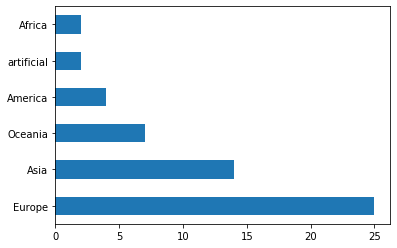

In [32]:
languages_df.Continent.value_counts().plot.barh()

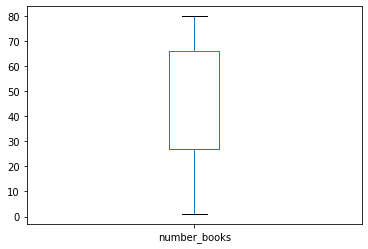

In [33]:
metadata.number_books.plot.box()

In [34]:
metadata.number_books.value_counts()

66    113
27     54
39     10
73      7
28      5
71      3
1       3
5       3
72      2
74      2
65      2
76      2
54      2
26      2
6       1
18      1
12      1
80      1
33      1
49      1
64      1
67      1
68      1
75      1
61      1
Name: number_books, dtype: int64

In [35]:
metadata.number_books.value_counts().sort_index()

1       3
5       3
6       1
12      1
18      1
26      2
27     54
28      5
33      1
39     10
49      1
54      2
61      1
64      1
65      2
66    113
67      1
68      1
71      3
72      2
73      7
74      2
75      1
76      2
80      1
Name: number_books, dtype: int64

In [36]:
metadata.shape

(221, 16)

In [37]:
metadata.number_books.sum()

11455